In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
import random
import math

### IMPORT DATA CLEAN

In [2]:
df_kendaraan = pd.read_csv('kendaraan_train_clean.csv')
df_kendaraan.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0.000000,1.0,0.153846,1.0,0.634615,1.0,0.5,1.0,0.409000,0.932099,0.301038,0.0
1,0.000003,0.0,0.430769,1.0,0.750000,0.0,1.0,0.0,0.367431,0.172840,0.512111,0.0
2,0.000007,0.0,0.015385,1.0,0.884615,1.0,0.5,1.0,0.496727,0.981481,0.377163,0.0
3,0.000014,0.0,0.461538,1.0,0.673077,0.0,1.0,0.0,0.536338,0.537037,0.636678,0.0
4,0.000017,0.0,0.015385,1.0,0.673077,1.0,0.5,1.0,0.310270,0.932099,0.557093,0.0


### CORRELATION PLOT

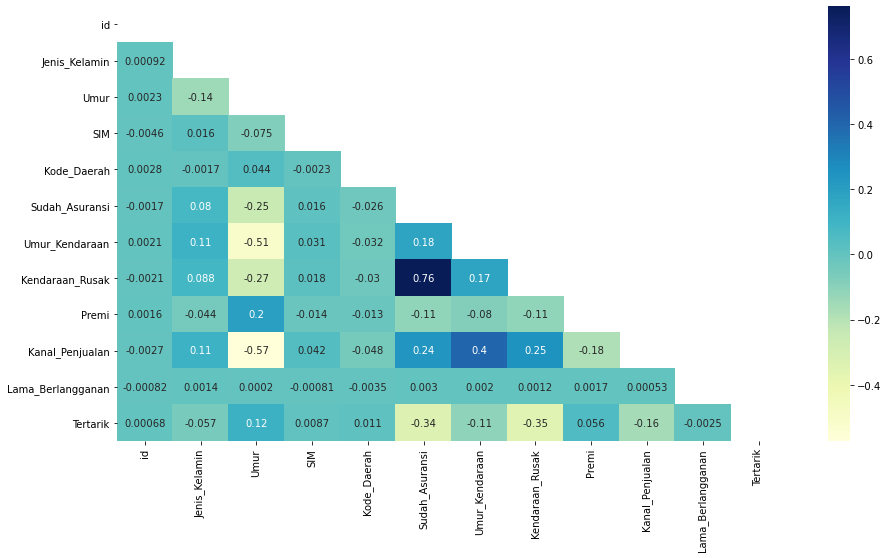

In [3]:
plt.figure(figsize=(15,8))
mask = np.triu(np.ones_like(df_kendaraan.corr()))
dataplot = sns.heatmap(df_kendaraan.corr(), cmap="YlGnBu", annot=True, mask=mask)

plt.show()

### SELEKSI DATA

In [4]:
df_kendaraan = df_kendaraan[['Umur', 'Kanal_Penjualan']]
df_kendaraan.head()

,Umur,Kanal_Penjualan
0,0.153846,0.932099
1,0.430769,0.172840
2,0.015385,0.981481
3,0.461538,0.537037
4,0.015385,0.932099


### UNCLUSTERED DATA

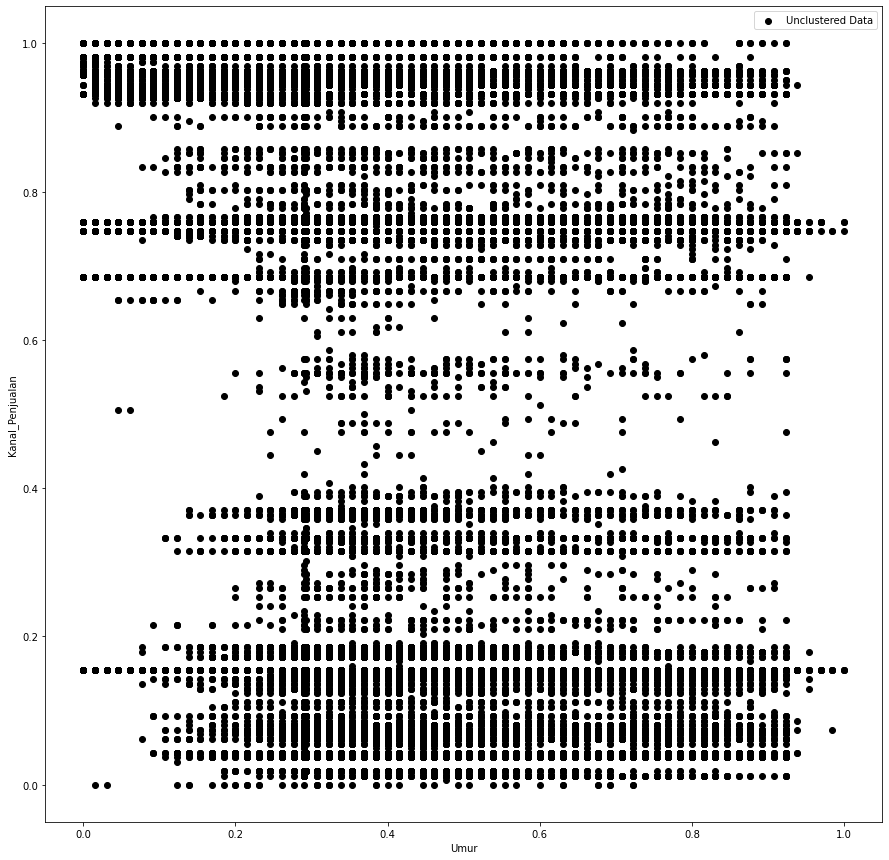

In [5]:
plt.figure(figsize=(15,15))
plt.scatter(df_kendaraan['Umur'], df_kendaraan['Kanal_Penjualan'], color='black', label="Unclustered Data")
plt.legend()
plt.xlabel("Umur")
plt.ylabel("Kanal_Penjualan")
plt.show()

### MEMBANGUN MODEL K-MEANS

In [6]:
def euclidean(x, y):
    d = math.sqrt(sum((x - y)**2))
    return d

In [7]:
def kmeans(k, max_iter, data):
    centroid = {}

    for c in range(k):
        ran = random.randint(0, len(data))
        centroid[c] = data[ran]

    for it in range(max_iter):
        cluster = {}

        for i in range(k):
            cluster[i] = []
        for x in data:
            dist = [euclidean(x, centroid[c]) for c in centroid]
            cluster[dist.index(min(dist))].append(x)

        prev_centroid = dict(centroid)
        for cl in cluster:
            centroid[cl] = np.mean(cluster[cl], axis=0)

        for c in centroid:
            old_centroid = prev_centroid[c]
            curr_centroid = centroid[c]

    return centroid, cluster
    

### CLUSTERED DATA

In [8]:
k = 5
max_iter = 100
data = df_kendaraan.to_numpy()

In [9]:
centroid, cluster = kmeans(k, max_iter, data)

In [10]:
data = []
for key in cluster.keys():
    for c in cluster.get(key):
        data.append((c[0], c[1] ,key))
data = pd.DataFrame(data)
data.columns = ['Umur', 'Kanal_Penjualan', 'Cluster']
data.sample(10)

,Umur,Kanal_Penjualan,Cluster
81103,0.046154,0.932099,0
83576,0.046154,0.932099,0
176936,0.292308,0.141975,3
185790,0.292308,0.154321,3
89365,0.107692,0.932099,0
36314,0.046154,0.932099,0
8269,0.076923,0.932099,0
156933,0.630769,0.759259,2
116873,0.446154,1.000000,1
229658,0.584615,0.154321,4


In [11]:
for i in range(k):
    print('centroid', i+1, ':', centroid[i])

centroid 1 : [0.07299076 0.92353217]
centroid 2 : [0.3269762  0.79583946]
centroid 3 : [0.65028228 0.77487298]
centroid 4 : [0.33975344 0.15393163]
centroid 5 : [0.66787101 0.15082663]


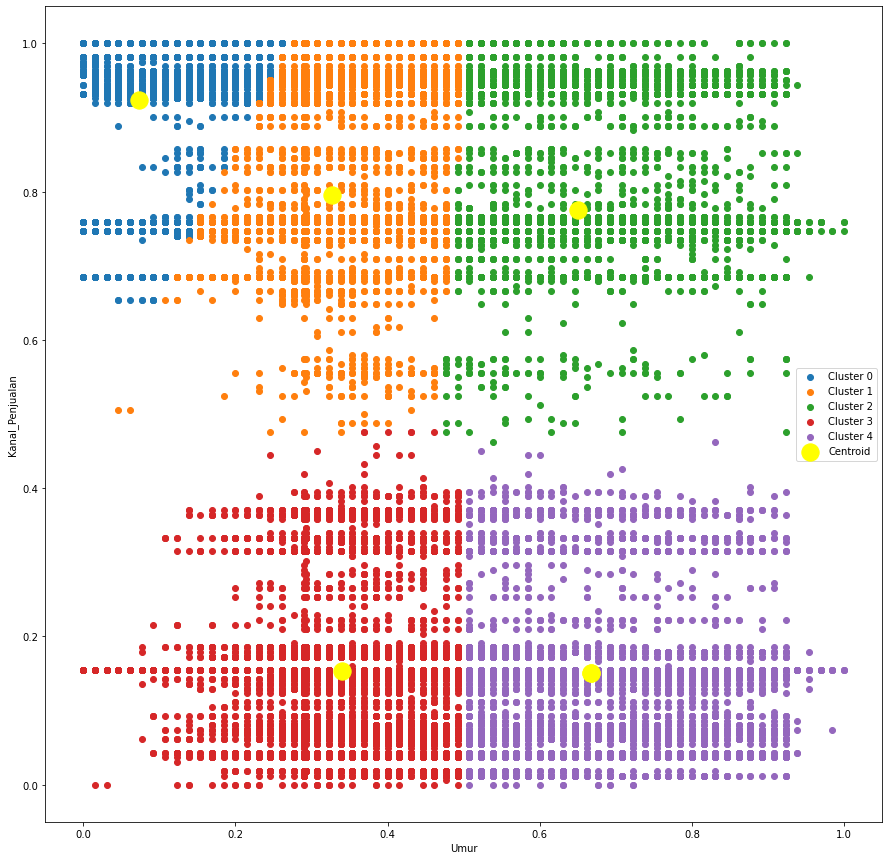

In [12]:
plt.figure(figsize=(15,15))
for i in range(k):
    plt.scatter(
        data['Umur'][data['Cluster']==i],
        data['Kanal_Penjualan'][data['Cluster'] == i],
        label=f'Cluster {i}'
    )

    plt.scatter(centroid[i][0], centroid[i][1], s= 300 ,color='yellow')
plt.scatter(centroid[i][0], centroid[i][1], s= 300 ,color='yellow', label='Centroid')
plt.legend()
plt.xlabel("Umur")
plt.ylabel("Kanal_Penjualan")
plt.show()

### EVALUASI MODEL

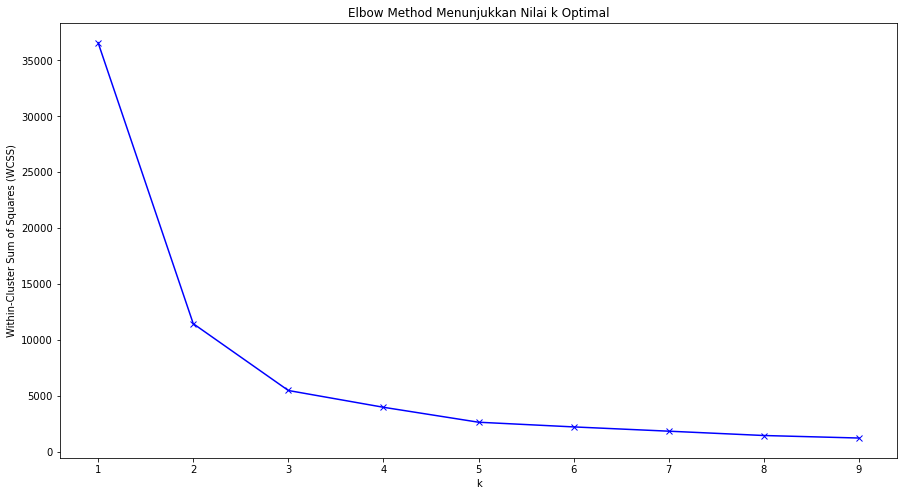

In [13]:
from sklearn.cluster import KMeans
distortions = []
k = range(1, 10)
for i in k:
    kmeanModel = KMeans(n_clusters=i)
    kmeanModel = kmeanModel.fit(df_kendaraan)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(15,8))
plt.plot(k, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method Menunjukkan Nilai k Optimal')
plt.show()

In [14]:
k = 3
max_iter = 100
data = df_kendaraan.to_numpy()

In [15]:
centroid, cluster = kmeans(k, max_iter, data)

In [16]:
data = []
for key in cluster.keys():
    for c in cluster.get(key):
        data.append((c[0], c[1] ,key))
data = pd.DataFrame(data)
data.columns = ['Umur', 'Kanal_Penjualan', 'Cluster']
data.sample(10)

,Umur,Kanal_Penjualan,Cluster
152916,0.107692,0.759259,1
152068,0.289913,0.932099,1
199452,0.338462,0.932099,2
39479,0.615385,0.061728,0
112719,0.061538,0.932099,1
191668,0.630769,0.685318,2
80716,0.061538,0.932099,1
109512,0.092308,0.932099,1
72117,0.061538,0.932099,1
139586,0.015385,0.932099,1


In [17]:
for i in range(k):
    print('centroid', i+1, ':', centroid[i])

centroid 1 : [0.46844516 0.15267537]
centroid 2 : [0.09610791 0.91461042]
centroid 3 : [0.46830594 0.77146942]


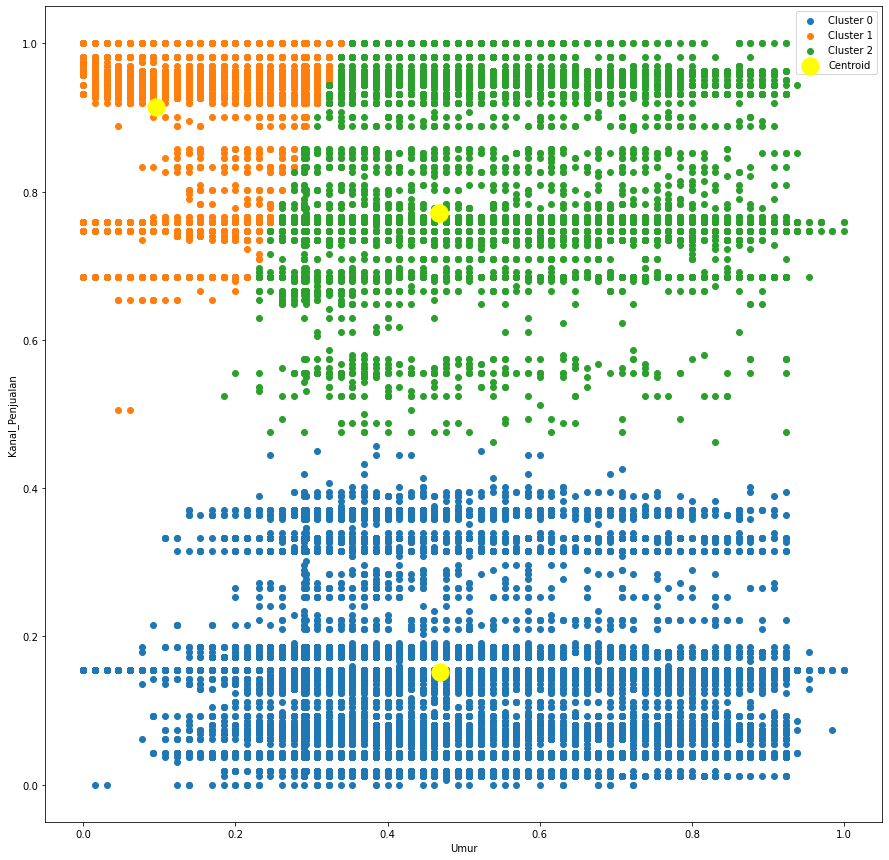

In [18]:
plt.figure(figsize=(15,15))
for i in range(k):
    plt.scatter(
        data['Umur'][data['Cluster']==i],
        data['Kanal_Penjualan'][data['Cluster'] == i],
        label=f'Cluster {i}'
    )

    plt.scatter(centroid[i][0], centroid[i][1], s= 300 ,color='yellow')
plt.scatter(centroid[i][0], centroid[i][1], s= 300 ,color='yellow', label='Centroid')
plt.legend()
plt.xlabel("Umur")
plt.ylabel("Kanal_Penjualan")
plt.show()